Python & SQL for Data Analysis:
●Python script to import the data in MySQL database.
●Retrieve data from the created database using SQL queries.
●Perform exploratory data analysis (EDA) using Python.
●Clean and preprocess the data as necessary.
●Apply statistical analysis and present key insights.

In [32]:
#script to import the data in MySQL database.
import csv
import mysql.connector

# MySQL database connection details
host = 'localhost'      # Replace with your host
port = '3307'           # Replace with your MySQL port
user = 'root'           # Replace with your username
password = 'Hamada@121199'   # Replace with your password
database = 'chefaa'     # Replace with your database name

# List of CSV file paths
csv_files = ['Sellers.csv', 'Customers.csv', 'Products.csv', 'Order_Payments.csv', 'Order_Items.csv','Categories.csv','Geolocation.csv','Reviews.csv','Orders.csv',]

# Establish a connection to the MySQL database
connection = mysql.connector.connect(
    host=host,
    port=port,
    user=user,
    password=password,
    database=database
)

# Create a cursor object to execute SQL queries
cursor = connection.cursor()

# Process each CSV file
for csv_file_path in csv_files:
    # Extract table name from the CSV file name
    table_name = csv_file_path.split('.')[0]

    # Open and read the CSV file
    with open(csv_file_path, 'r') as file:
        csv_data = csv.reader(file)

        # Skip the header row if it exists
        header = next(csv_data)

        # Build the CREATE TABLE query dynamically based on the columns
        column_definitions = ', '.join([f'{column} VARCHAR(255)' for column in header])
        create_table_query = f"CREATE TABLE IF NOT EXISTS {table_name} ({column_definitions})"

        # Execute the CREATE TABLE query
        cursor.execute(create_table_query)

        # Build the INSERT query dynamically based on the number of columns
        columns = ', '.join(header)
        values = ', '.join(['%s'] * len(header))
        insert_query = f"INSERT INTO {table_name} ({columns}) VALUES ({values})"

        # Iterate over each row in the CSV file and execute the INSERT query
        for row in csv_data:
            cursor.execute(insert_query, row)

# Commit the changes and close the cursor and connection
connection.commit()
cursor.close()
connection.close()

print("Data imported successfully!")

Data imported successfully!


In [1]:
#Retrieve data from the created database using SQL queries.
#Perform exploratory data analysis (EDA) using Python.
#Clean and preprocess the data as necessary.
#Apply statistical analysis and present key insights

import mysql.connector
import pandas as pd
from tabulate import tabulate

# MySQL database connection details
host = 'localhost'      # Replace with your host
port = '3307'           # Replace with your MySQL port
user = 'root'           # Replace with your username
password = 'Hamada@121199'   # Replace with your password
database = 'chefaa'     # Replace with your database name

# Establish a connection to the MySQL database
connection = mysql.connector.connect(
    host=host,
    port=port,
    user=user,
    password=password,
    database=database
)

# Create a cursor object to execute SQL queries
cursor = connection.cursor()

# Function to execute a query and return the results as a DataFrame
def execute_query(query):
    cursor.execute(query)
    columns = [column[0] for column in cursor.description]
    data = cursor.fetchall()
    df = pd.DataFrame(data, columns=columns)
    return df

try:
    # SELECT queries
    queries = [
        "SELECT * FROM Categories LIMIT 100",
        "SELECT * FROM customers LIMIT 100",
        "SELECT * FROM geolocation LIMIT 100",
        "SELECT * FROM order_items LIMIT 100",
        "SELECT * FROM order_payments LIMIT 100",
        "SELECT * FROM orders LIMIT 100",
        "SELECT * FROM products LIMIT 100",
        "SELECT * FROM reviews LIMIT 100",
        "SELECT * FROM sellers LIMIT 100"
        
        
        
    ]
    

# Execute each SELECT query and display the results as formatted tables
    for query in queries:
        df = execute_query(query)
        print(f"\nQuery: {query}")
        print(tabulate(df, headers='keys', tablefmt='psql'))
        
        
        
# Perform EDA and statistical analysis
        print("\nExploratory Data Analysis:")
        # Clean and preprocess the data as necessary
        #Remove missing values
        df_cleaned = df.dropna()
        
        
        
#Calculate summary statistics
        summary_stats = df_cleaned.describe()
        print(tabulate(summary_stats, headers='keys', tablefmt='psql'))

        
        

except mysql.connector.Error as error:
    print(f"Error retrieving data: {error}")
    




Query: SELECT * FROM Categories LIMIT 100
+----+------------------------------------------------+-----------------------------------------+
|    | product_category_name                          | product_category_name_english           |
|----+------------------------------------------------+-----------------------------------------|
|  0 | beleza_saude                                   | health_beauty                           |
|  1 | informatica_acessorios                         | computers_accessories                   |
|  2 | automotivo                                     | auto                                    |
|  3 | cama_mesa_banho                                | bed_bath_table                          |
|  4 | moveis_decoracao                               | furniture_decor                         |
|  5 | esporte_lazer                                  | sports_leisure                          |
|  6 | perfumaria                                     | perfumery          

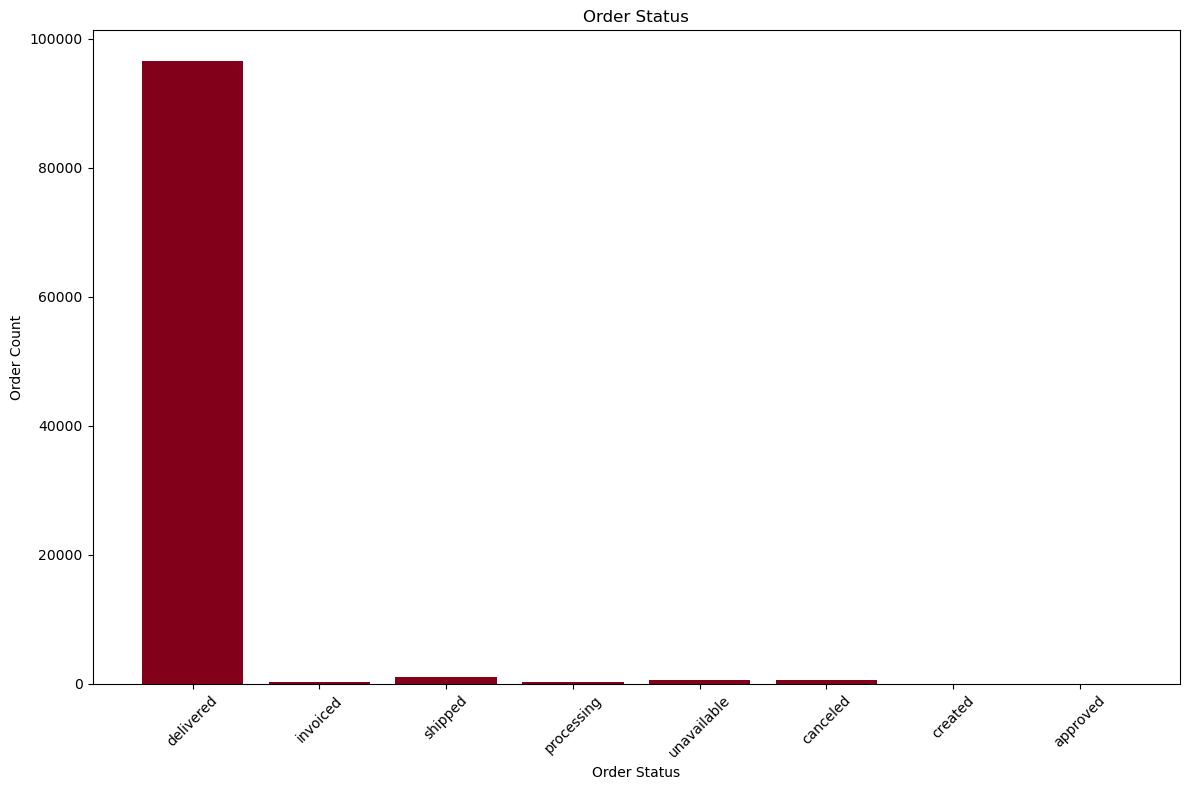

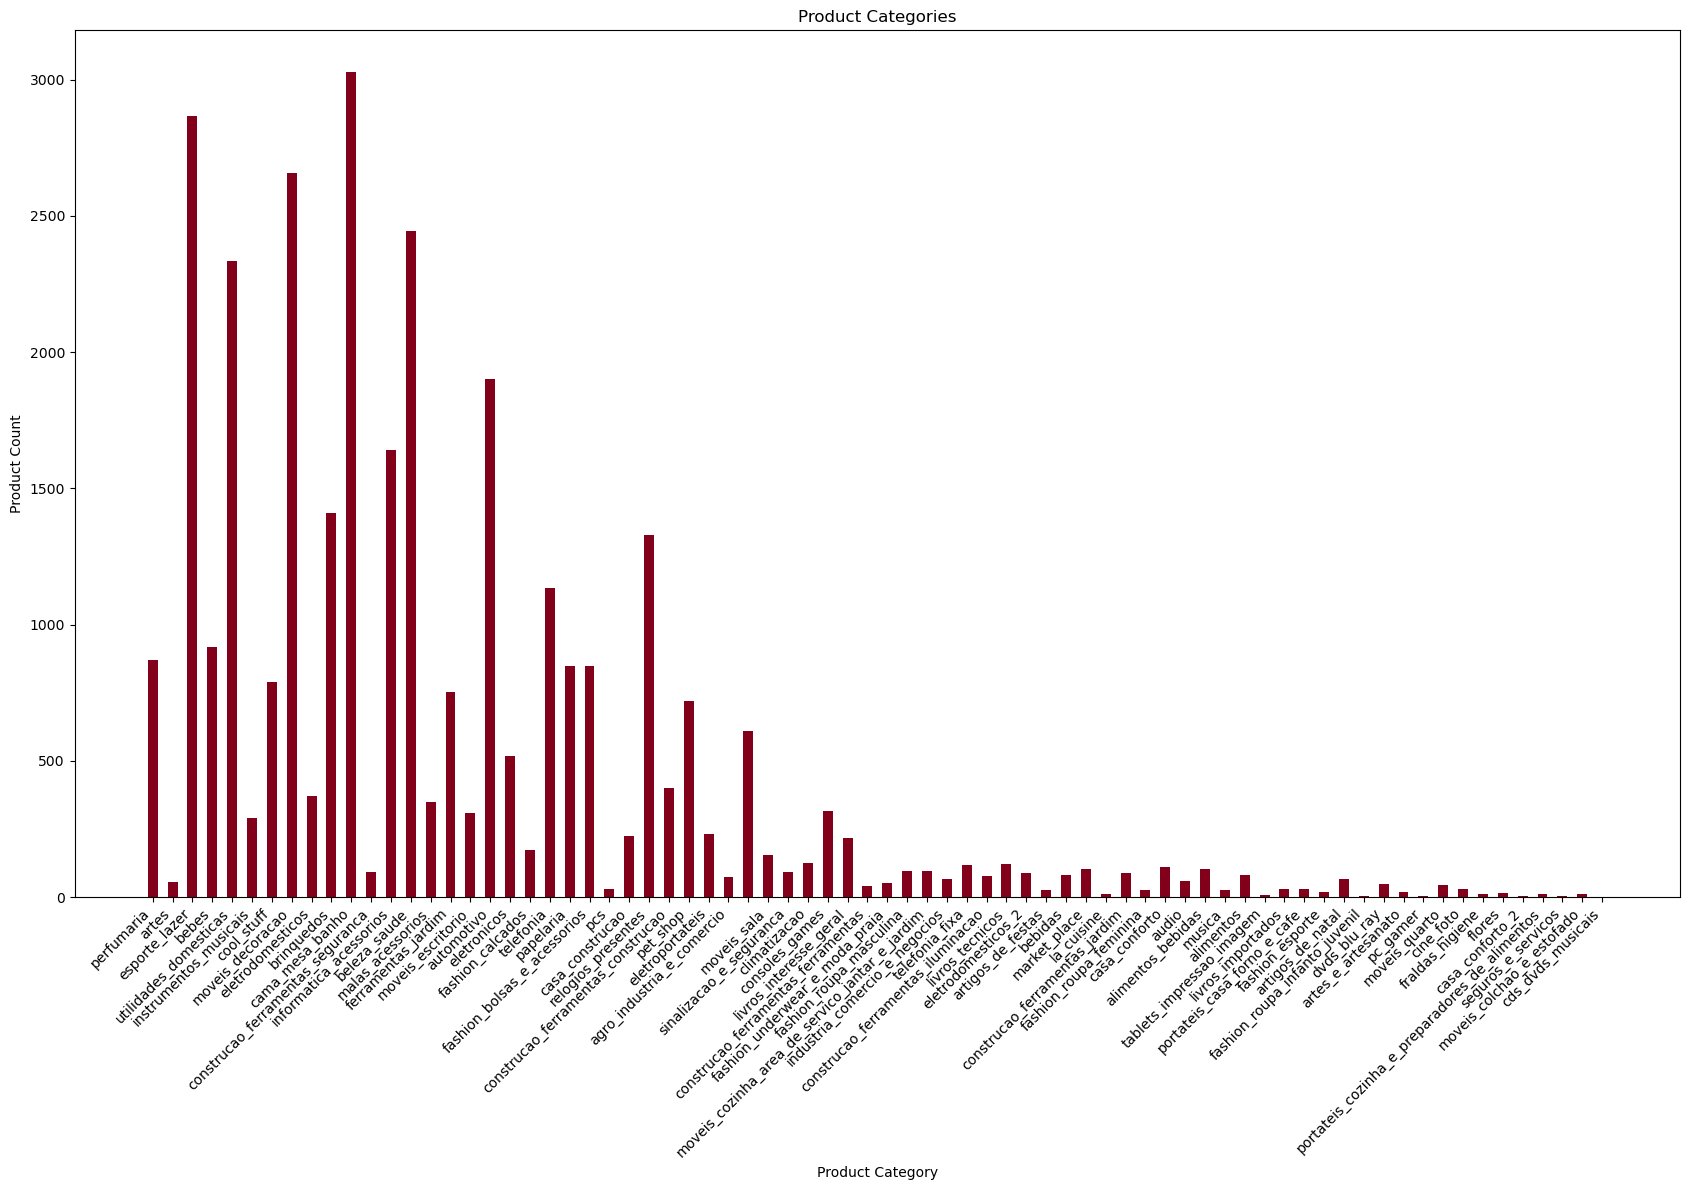

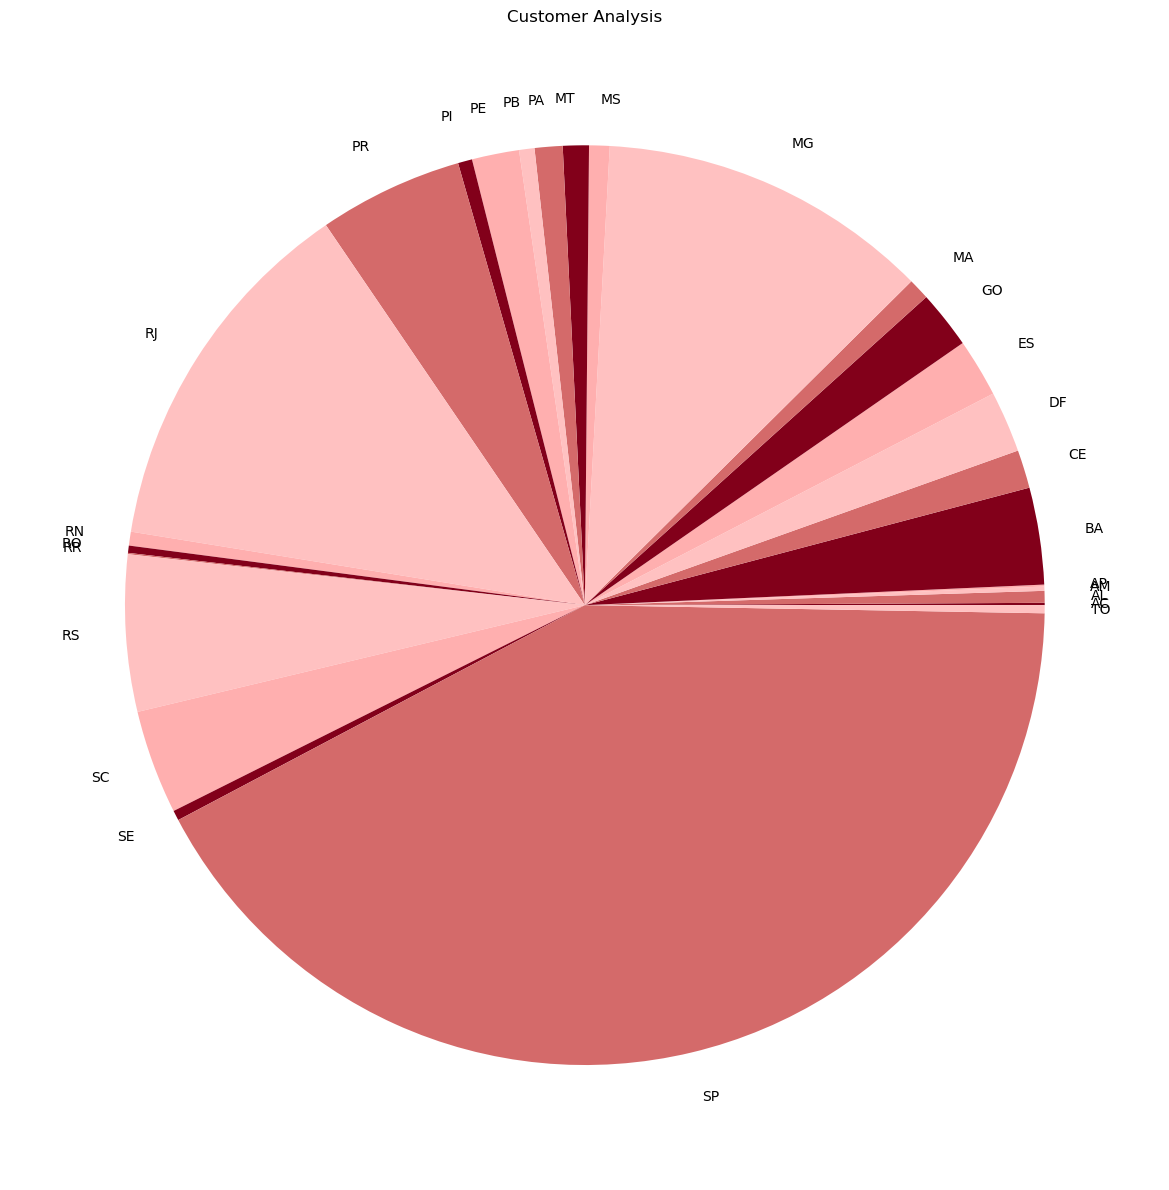

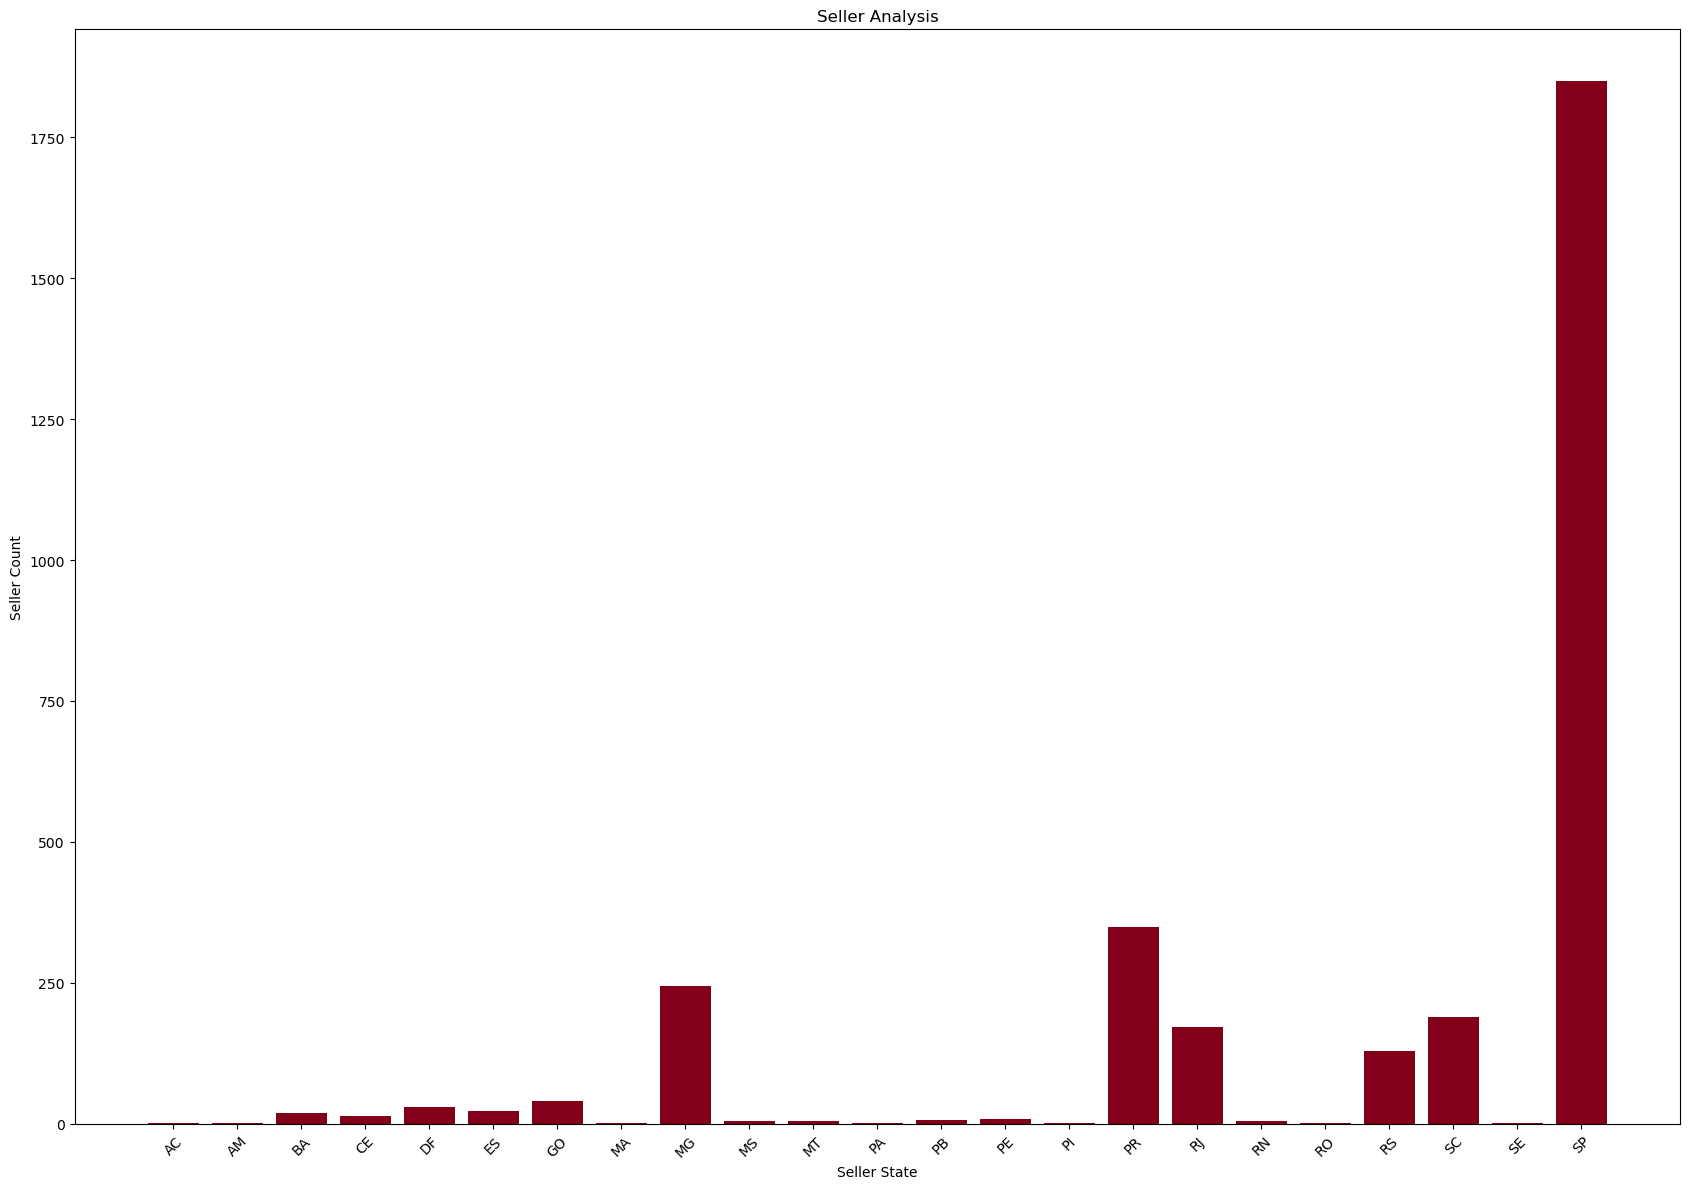

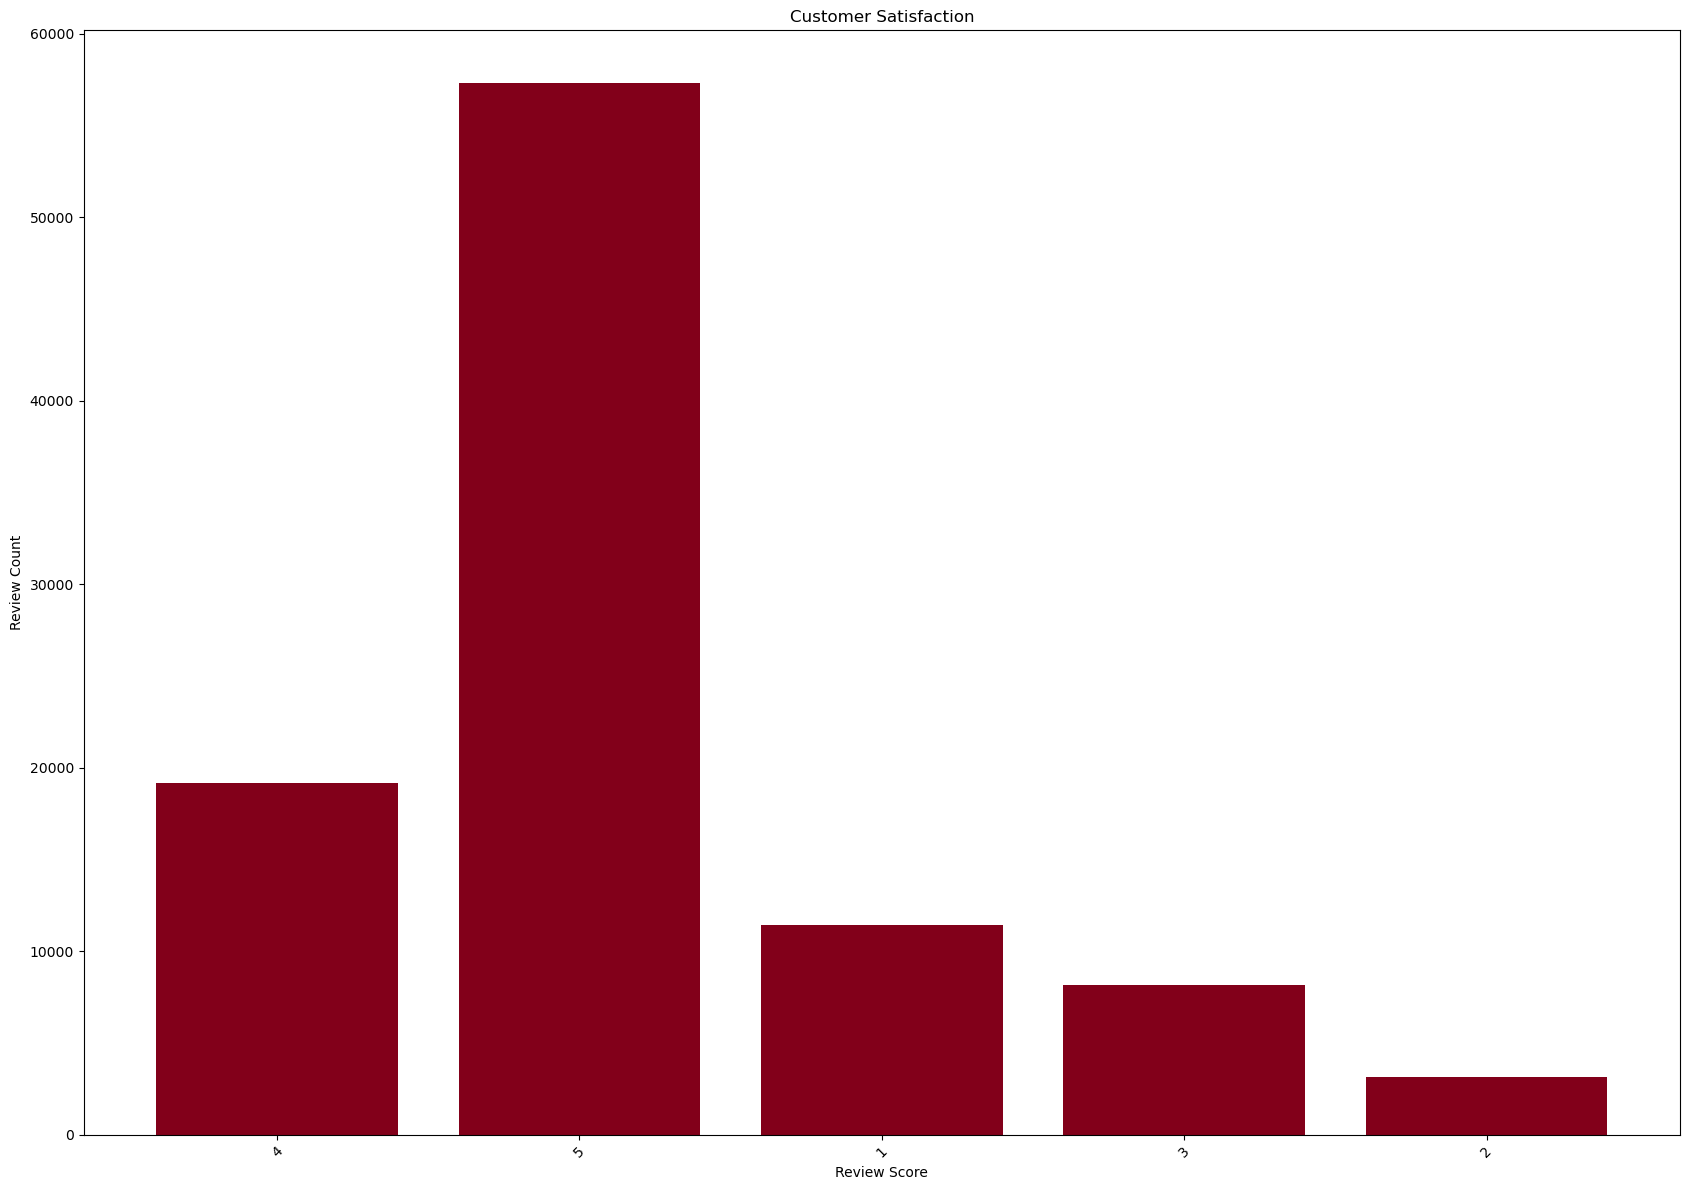

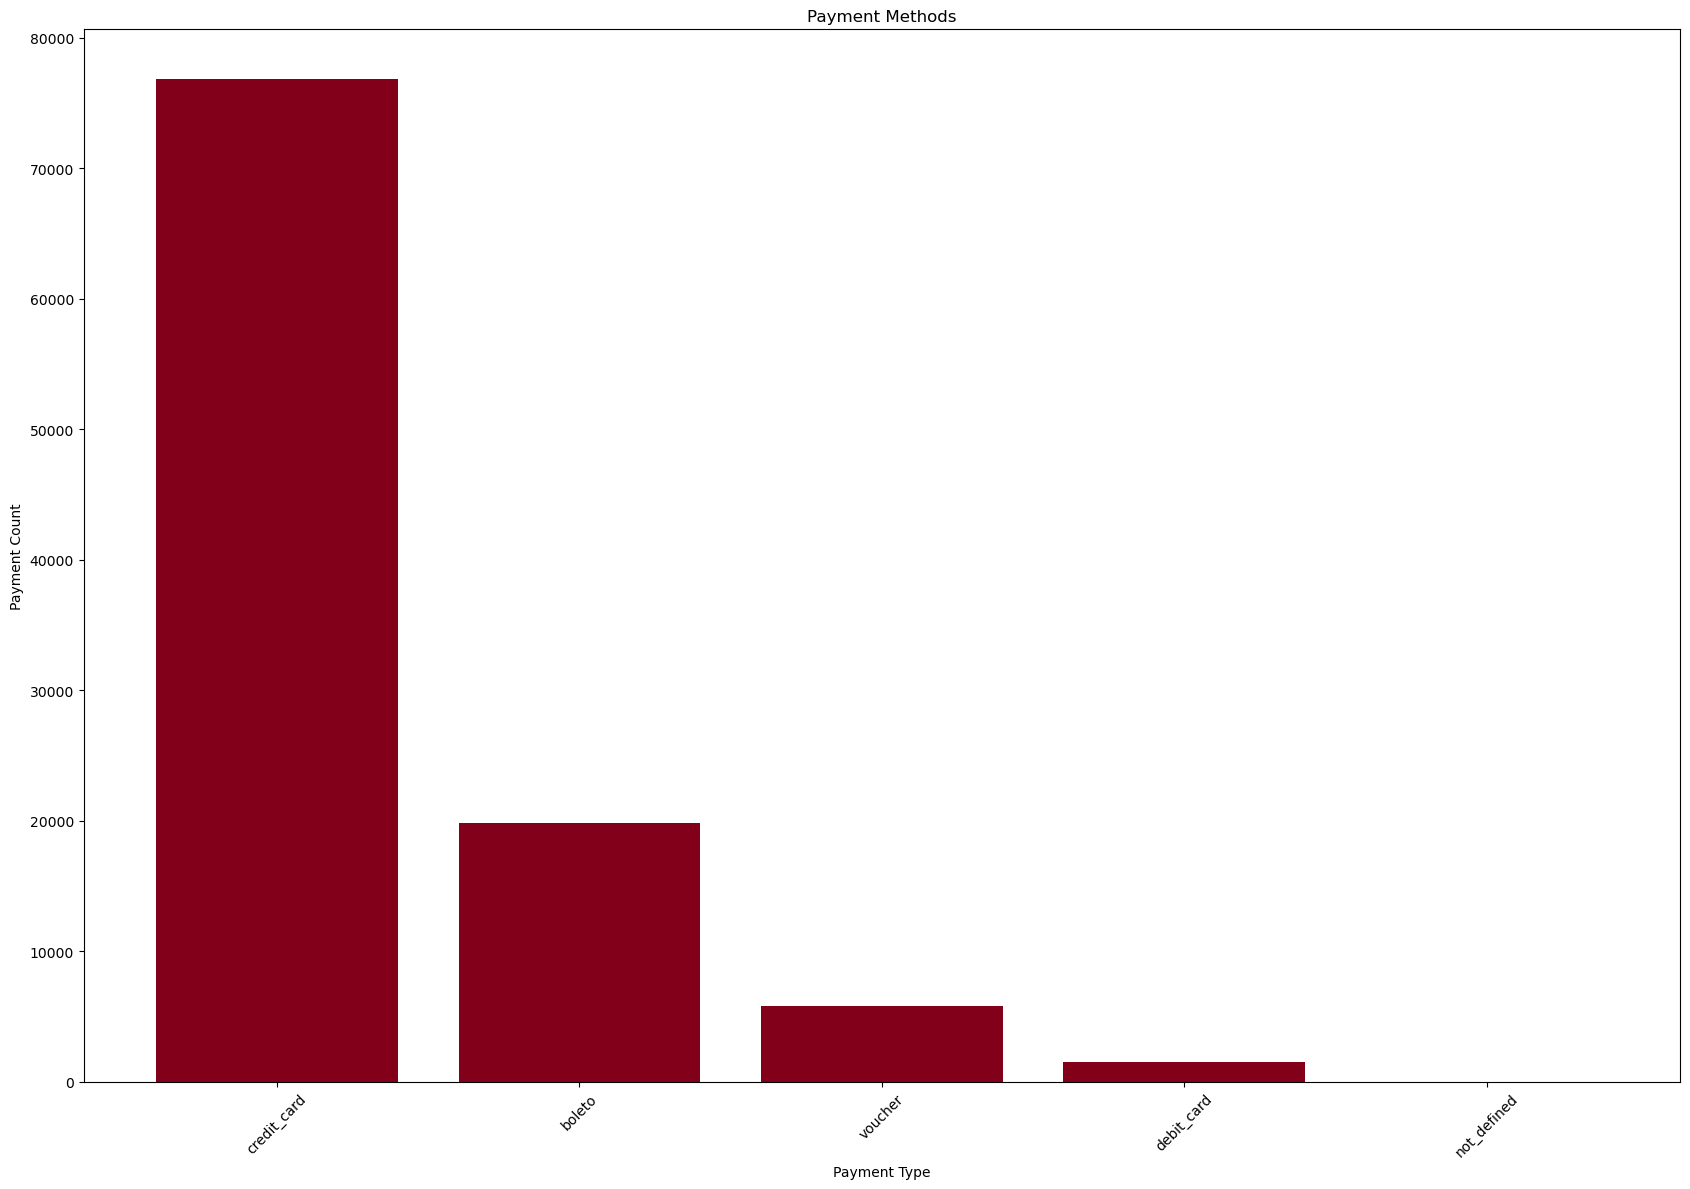

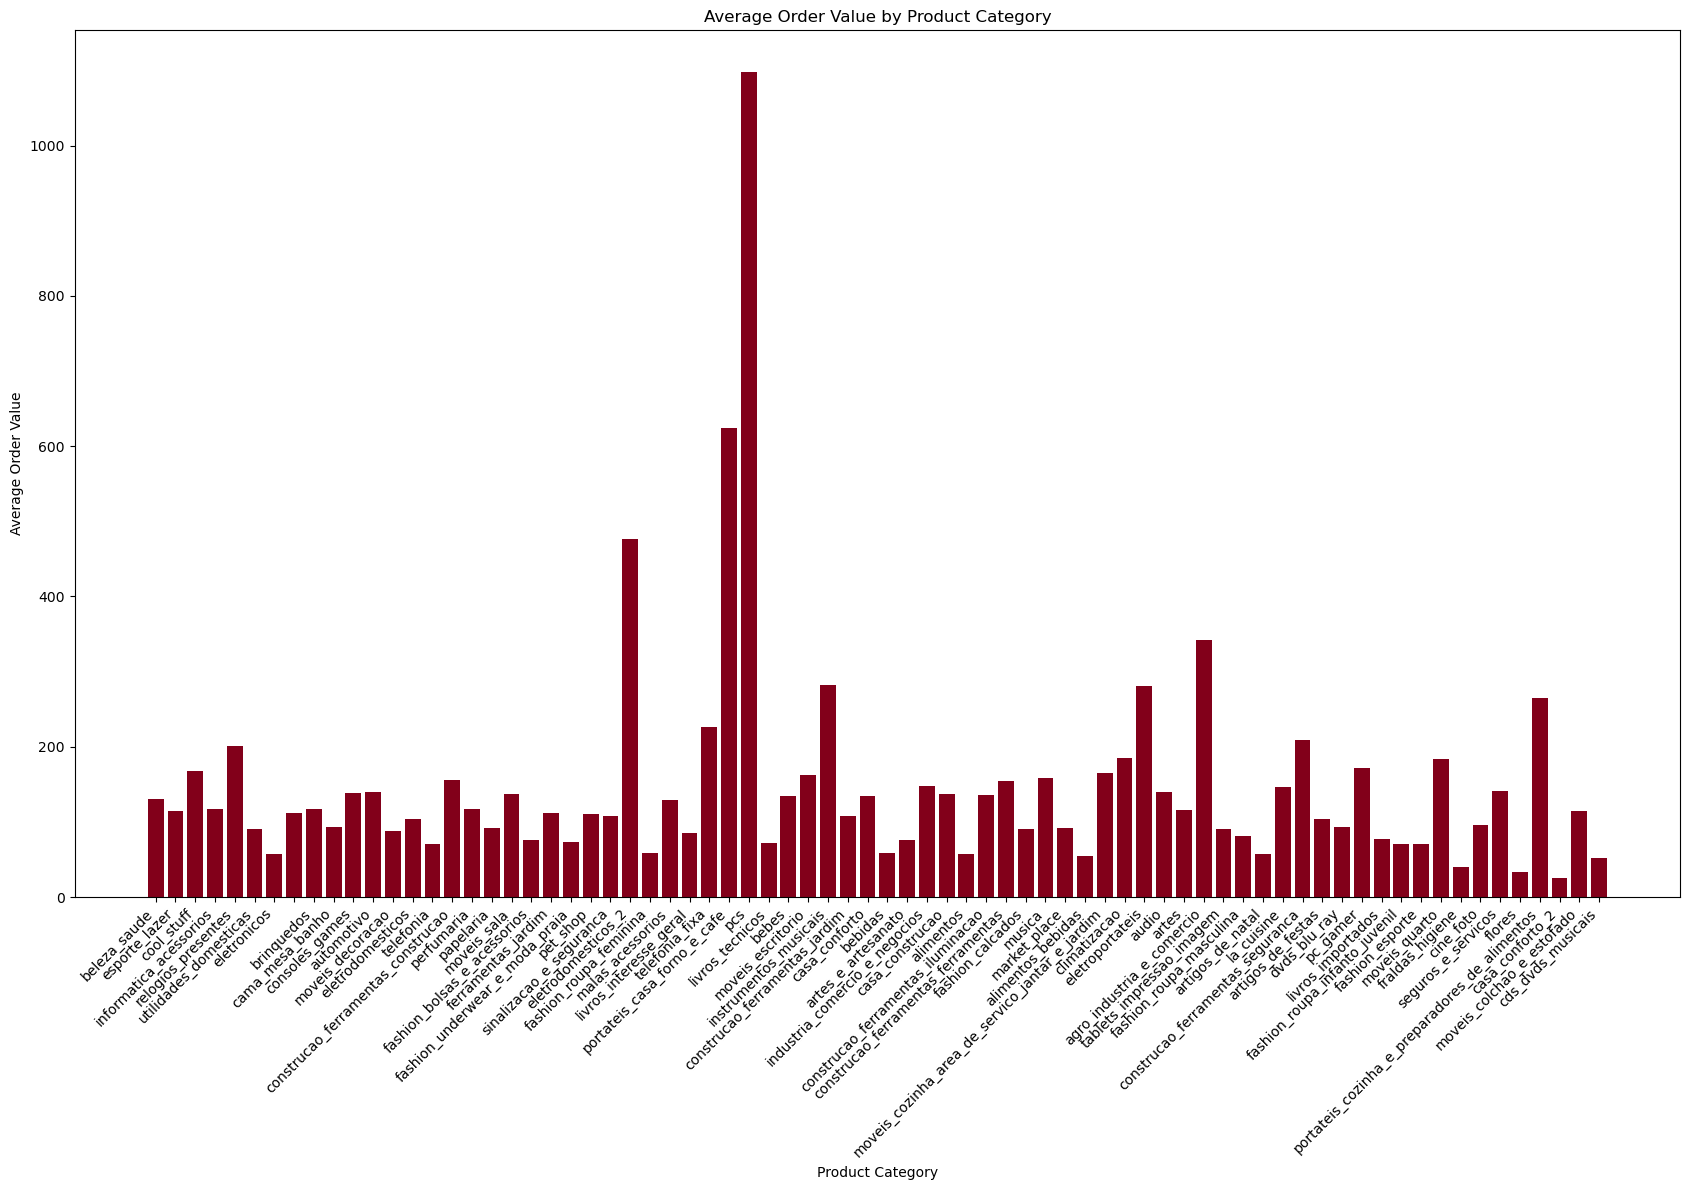

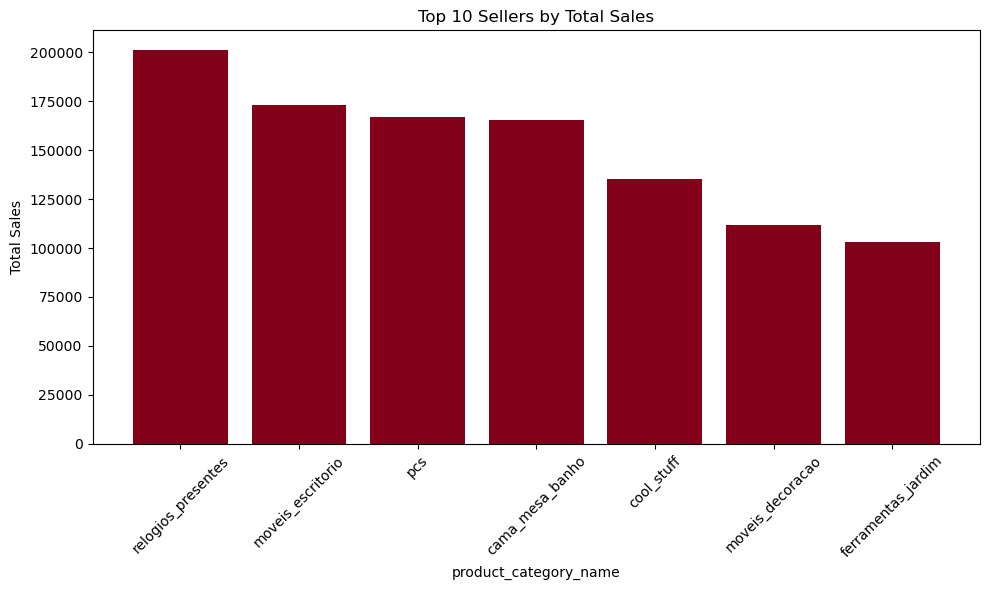

In [25]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# MySQL database connection details
host = 'localhost'
port = '3307'
user = 'root'
password = 'Hamada@121199'
database = 'chefaa'

# Establish a connection to the MySQL database
connection = mysql.connector.connect(
    host=host,
    port=port,
    user=user,
    password=password,
    database=database
)

# Suppressing the warning about SQL connection
warnings.filterwarnings('ignore', message='pandas only supports SQLAlchemy connectable*')

# Create indexes on relevant columns if not already present



# Query to retrieve data for Order Status stacked bar chart
order_status_query = """
SELECT order_status, COUNT(order_id) AS order_count
FROM Orders
GROUP BY order_status
"""

# Query to retrieve data for Product Categories bar chart
product_categories_query = """
SELECT product_category_name, COUNT(product_id) AS product_count
FROM Products
GROUP BY product_category_name
"""

# Query to retrieve data for Customer Analysis pie chart
customer_analysis_query = """
SELECT Customer_state, COUNT(DISTINCT Customer_id) AS customer_count
FROM Customers
GROUP BY Customer_state
"""

# Query to retrieve data for Seller Analysis bar chart
seller_analysis_query = """
SELECT seller_state, COUNT(DISTINCT seller_id) AS seller_count
FROM Sellers
GROUP BY seller_state
"""


# Query to retrieve data for Customer Satisfaction bar chart
customer_satisfaction_query = """
SELECT review_score, COUNT(review_id) AS review_count
FROM reviews
GROUP BY review_score
"""

# Query to retrieve data for Geolocation Analysis map visualization
geolocation_analysis_query = """
SELECT geolocation_lat, geolocation_lng
FROM Geolocation
"""

# Query to retrieve data for Payment Methods bar chart
payment_methods_query = """
SELECT payment_type, COUNT(order_id) AS payment_count
FROM Order_Payments
GROUP BY payment_type
"""


# Query to retrieve data for Average Order Value by Product Category
average_order_value_query = """
SELECT product_category_name, AVG(price) AS average_order_value
FROM Order_Items oi
JOIN Products p ON oi.product_id = p.product_id
GROUP BY product_category_name
"""

# Query to retrieve data for Top 10 Sellers by Total Sales
top_sellers_query = """
SELECT s.seller_id, s.seller_city, s.seller_state, p.product_category_name, SUM(oi.price) AS total_sales
FROM Sellers s
JOIN Order_Items oi ON s.seller_id = oi.seller_id
JOIN Products p ON oi.product_id = p.product_id
GROUP BY s.seller_id, s.seller_city, s.seller_state, p.product_category_name
ORDER BY total_sales DESC
LIMIT 10;
"""




# Execute the queries and fetch the data into pandas DataFrames


order_status_data = pd.read_sql(order_status_query, connection)
product_categories_data = pd.read_sql(product_categories_query, connection)
customer_analysis_data = pd.read_sql(customer_analysis_query, connection)
seller_analysis_data = pd.read_sql(seller_analysis_query, connection)
order_performance_data = pd.read_sql(order_performance_query, connection)
customer_satisfaction_data = pd.read_sql(customer_satisfaction_query, connection)
geolocation_analysis_data = pd.read_sql(geolocation_analysis_query, connection)
payment_methods_data = pd.read_sql(payment_methods_query, connection)

# Execute the query and fetch the data into a pandas DataFrame
average_order_value_data = pd.read_sql(average_order_value_query, connection)

# Execute the query and fetch the data into a pandas DataFrame
df = pd.read_sql(top_sellers_query, connection)




# Close the database connection
connection.close()


#  figure size for all plots
figure_size = (12, 8)


# Order Status stacked bar chart
plt.figure(figsize=figure_size)
plt.bar(order_status_data['order_status'], order_status_data['order_count'], color='#82001A')
plt.xlabel('Order Status')
plt.ylabel('Order Count')
plt.title('Order Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


figure_size = (17,12)
plt.figure(figsize=figure_size)
# Define the width of the bars
bar_width = 0.5  # Adjust this value to set the width between bars
# Create a bar chart
plt.bar(
    product_categories_data['product_category_name'],
    product_categories_data['product_count'],
    width=bar_width,
    color='#82001A'
)
plt.xlabel('Product Category')
plt.ylabel('Product Count')
plt.title('Product Categories')
plt.xticks(rotation=45, ha='right')  # Adjust rotation and horizontal alignment
plt.tight_layout()
plt.show()


# Customer Analysis pie chart
plt.figure(figsize=figure_size)
plt.pie(customer_analysis_data['customer_count'], labels=customer_analysis_data['Customer_state'], colors=['#82001A', '#D46A6A', '#FFC1C1', '#FFAFAF'])
plt.title('Customer Analysis')
plt.tight_layout()
plt.show()

# Seller Analysis bar chart
plt.figure(figsize=figure_size)
plt.bar(seller_analysis_data['seller_state'], seller_analysis_data['seller_count'], color='#82001A')
plt.xlabel('Seller State')
plt.ylabel('Seller Count')
plt.title('Seller Analysis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






# Customer Satisfaction bar chart
plt.figure(figsize=figure_size)
plt.bar(customer_satisfaction_data['review_score'], customer_satisfaction_data['review_count'], color='#82001A')
plt.xlabel('Review Score')
plt.ylabel('Review Count')
plt.title('Customer Satisfaction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Payment Methods bar chart
plt.figure(figsize=figure_size)
plt.bar(payment_methods_data['payment_type'], payment_methods_data['payment_count'], color='#82001A')
plt.xlabel('Payment Type')
plt.ylabel('Payment Count')
plt.title('Payment Methods')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average Order Value by Product Category bar chart
plt.figure(figsize=figure_size)
plt.bar(average_order_value_data['product_category_name'], average_order_value_data['average_order_value'], color='#82001A')
plt.xlabel('Product Category')
plt.ylabel('Average Order Value')
plt.title('Average Order Value by Product Category')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()



# Plotting the top sellers by total sales
plt.figure(figsize=(10, 6))
plt.bar(df['product_category_name'], df['total_sales'], color='#82001A')
plt.xlabel('product_category_name')
plt.ylabel('Total Sales')
plt.title('Top 10 Sellers by Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


